In [1]:
import numpy as np
import pandas as pd

In [139]:
users=pd.read_json("data/customers.json")
users.columns = ["user_id",'username']
users

,user_id,username
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen
...,...,...
673,103904,yenxaome
674,103610,yoneteru
675,103718,young.che
676,23251,zeatop939


In [140]:
products=pd.read_json("data/products.json")
products.columns = ["product_id","product_name","price"]
products

,product_id,product_name,price
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0
...,...,...,...
686,687,Bird Box,1.0
687,688,Snowpiercer,2.0
688,689,Edge of Tomorrow,1.0
689,690,Ponyo,3.0


In [141]:
ratings=pd.read_json("data/ratings.json")
ratings.drop("CreateDate",inplace = True, axis=1)
ratings.columns = ["user_id","product_id","rating"]
ratings

,user_id,product_id,rating
0,103416,619,1
1,103654,411,1
2,103954,298,3
3,103672,361,5
4,103960,536,5
...,...,...,...
130749,103907,501,1
130750,103907,200,1
130751,103907,184,1
130752,103907,211,1


In [142]:
ratings =  pd.merge(ratings, products, on='product_id',how="outer")

After I have merge, from my observation, there are many duplicates. Means that a user rate the same product different time. Because our dataset is pretty large (139.000), we can drop these duplicates instead of doing anything about it, without worrying it will affect our judgement (I gain such a knowledge from doing music recommendation :v very helpful indeed). Removing these dupliates avoid biases I believe

In [143]:
ratings = ratings.drop_duplicates(['user_id', 'product_id'])

In [144]:
ratings

,user_id,product_id,rating,product_name,price
0,103416,619,1,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
1,103401,619,4,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
2,103491,619,1,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
3,103856,619,4,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
4,103320,619,4,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
...,...,...,...,...,...
130747,103896,236,5,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130748,103699,236,4,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130749,103890,236,4,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130751,103970,236,3,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0


# Non personalized recommendation

In [145]:
product_popularity = ratings["product_id"].value_counts()
print(product_popularity)

product_id
238    178
195    171
332    170
176    170
558    169
      ... 
308    128
552    128
22     127
304    127
76     124
Name: count, Length: 691, dtype: int64


In [146]:
average_rating_df = ratings[["product_id", "rating"]].groupby('product_id').mean()
sorted_average_ratings = average_rating_df.sort_values(by="rating", ascending=False)
print(sorted_average_ratings)

              rating
product_id          
96          3.405405
33          3.402439
606         3.397351
78          3.391892
458         3.386207
...              ...
674         2.891892
684         2.885350
669         2.879433
406         2.839161
537         2.810458

[691 rows x 1 columns]


However, we can't not simply base on the rating as it will not fully encapsulate the user's review. Therefore, we must do something about it by setting a threshold, I will use the frequency of 150 as threshold as the mean of our dataset is 190

In [147]:
# Create a list of only products appearing > 150 times in the dataset
product_popularity = ratings["product_id"].value_counts()
popular_product = product_popularity[product_popularity > 150].index
print(popular_product)

Index([238, 195, 332, 176, 558, 454, 326, 146, 604, 455,
       ...
       585, 236, 518,  34, 683, 571, 110, 508, 166, 213],
      dtype='int64', name='product_id', length=307)


In [148]:
popular_product_ranking = ratings[ratings["product_id"].isin(popular_product)]
print(popular_product_ranking)

        user_id  product_id  rating  \
0        103416         619       1   
1        103401         619       4   
2        103491         619       1   
3        103856         619       4   
4        103320         619       4   
...         ...         ...     ...   
130747   103896         236       5   
130748   103699         236       4   
130749   103890         236       4   
130751   103970         236       3   
130752   103541         236       3   

                                             product_name   price  
0       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
1       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
2       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
3       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
4       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
...                                                   ...     ...  
130747  Black & White Diamond Promise Ring 1/6 ct tw S.

In [149]:
popular_average_rating_df = popular_product_ranking[["product_id","rating"]].groupby("product_id").mean()
sorted_popular_average_rating_df = popular_average_rating_df.sort_values(by="rating",ascending=False)
print(sorted_popular_average_rating_df)

              rating
product_id          
33          3.402439
606         3.397351
426         3.357143
93          3.341935
421         3.339869
...              ...
111         2.947712
116         2.947368
209         2.900662
684         2.885350
537         2.810458

[307 rows x 1 columns]


***Now let's make recommendation***

In [150]:
recommend_products = []
# for idx in sorted_popular_average_rating_df.index:
for idx in sorted_popular_average_rating_df.index:
        product = products[products["product_id"] == idx]
        product= {
            "product_id": product["product_id"].values[0], 
            "product_name": product["product_name"].values[0],
            "price": product["price"].values[0]
        }
        recommend_products.append(product)
        print(recommend_products[:10])

[{'product_id': 33, 'product_name': 'Ray Ban Aviator Sunglasses', 'price': 25.0}]
[{'product_id': 33, 'product_name': 'Ray Ban Aviator Sunglasses', 'price': 25.0}, {'product_id': 606, 'product_name': 'Disney Treasures The Aristocats Diamond Earrings 1/10 ct tw Sterling Silver & 10K Rose Gold', 'price': 249.99}]
[{'product_id': 33, 'product_name': 'Ray Ban Aviator Sunglasses', 'price': 25.0}, {'product_id': 606, 'product_name': 'Disney Treasures The Aristocats Diamond Earrings 1/10 ct tw Sterling Silver & 10K Rose Gold', 'price': 249.99}, {'product_id': 426, 'product_name': 'Forever Connected Diamond Necklace 1/3 ct tw Pear/Round-Cut 10K Yellow Gold 18"', 'price': 799.99}]
[{'product_id': 33, 'product_name': 'Ray Ban Aviator Sunglasses', 'price': 25.0}, {'product_id': 606, 'product_name': 'Disney Treasures The Aristocats Diamond Earrings 1/10 ct tw Sterling Silver & 10K Rose Gold', 'price': 249.99}, {'product_id': 426, 'product_name': 'Forever Connected Diamond Necklace 1/3 ct tw Pear/R

[{'product_id': 33, 'product_name': 'Ray Ban Aviator Sunglasses', 'price': 25.0}, {'product_id': 606, 'product_name': 'Disney Treasures The Aristocats Diamond Earrings 1/10 ct tw Sterling Silver & 10K Rose Gold', 'price': 249.99}, {'product_id': 426, 'product_name': 'Forever Connected Diamond Necklace 1/3 ct tw Pear/Round-Cut 10K Yellow Gold 18"', 'price': 799.99}, {'product_id': 93, 'product_name': 'Dép cói', 'price': 5.0}, {'product_id': 421, 'product_name': "1/6 Ct. tw Diamond Initials Couple's Heart Necklace", 'price': 394.0}, {'product_id': 182, 'product_name': 'Samsung Galaxy A70', 'price': 385.0}, {'product_id': 651, 'product_name': '1/10 Carat t.w. Diamond Promise Ring', 'price': 116.32}, {'product_id': 619, 'product_name': 'Le Vian Chocolate Diamonds 1/4 ct tw Earrings 14K Honey Gold', 'price': 1049.0}, {'product_id': 382, 'product_name': 'Lab-Created Emerald MOM Necklace Sterling Silver 18"', 'price': 149.99}, {'product_id': 648, 'product_name': 'Diamond Promise Ring 1/10 ct 

After setting the threshold, now we see that product_id 33, 606 and 426 are the one that have highest rating. We will suggest these products to our users.

# Non personalized suggestions: If the user click into 1 product

Although we have find the most liked products, we still haven't access users's experience: the previous item they sell might reflect their experience selling the next products. We will make suggestions by finding the most commonly seen together items. We will use permutations to find all pairs of products retail by the same users.

In [151]:
users = pd.merge(users, ratings, on='user_id',how="outer")
users

,user_id,username,product_id,rating,product_name,price
0,103603,1000kgthanh,619.0,4.0,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.00
1,103603,1000kgthanh,411.0,4.0,Diamond Heart Necklace 1/10 ct tw Round-Cut 10...,299.99
2,103603,1000kgthanh,361.0,4.0,Neil Lane Diamond Wedding Band 1/4 ct tw 14K W...,719.99
3,103603,1000kgthanh,481.0,4.0,Amethyst Heart Necklace Tanzanites & Diamonds ...,599.99
4,103603,1000kgthanh,41.0,4.0,Flower Girl Bracelet,360.00
...,...,...,...,...,...,...
103526,103957,zHeroNguyen,515.0,2.0,Forever Connected Diamond Necklace 1/5 ct tw R...,399.99
103527,103957,zHeroNguyen,363.0,4.0,Stackable Ring Lab-Created Pink Sapphire Sterl...,149.99
103528,103957,zHeroNguyen,302.0,2.0,Diamond Ring 1/2 ct tw Round-cut 10K White Gold,999.00
103529,103957,zHeroNguyen,499.0,2.0,Le Vian Morganite Necklace 1/10 ct tw Diamonds...,1299.99


In [152]:
users = users.drop_duplicates(['user_id', 'product_id'])

In [153]:
from itertools import permutations
def create_pairs(x):
    pairs = pd.DataFrame(list(permutations(x.values, 2)), columns=["product_1","product_2"])
    return pairs

product_pairs = users.groupby("user_id")["product_id"].apply(create_pairs)
print(product_pairs.head())

/var/folders/nl/_hr7lj355xl4gxtqkyg3jv5m0000gp/T/ipykernel_9577/3477967549.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  product_pairs = users.groupby("user_id")["product_id"].apply(create_pairs)


           product_1  product_2
user_id                        
3       0      298.0      266.0
        1      298.0      120.0
        2      298.0      669.0
        3      298.0       78.0
        4      298.0      485.0


We don't need the user_id anymore, let drop it

In [154]:
product_pairs = product_pairs.reset_index(drop=True)
print(product_pairs)

          product_1  product_2
0             298.0      266.0
1             298.0      120.0
2             298.0      669.0
3             298.0       78.0
4             298.0      485.0
...             ...        ...
37360849      469.0      363.0
37360850      469.0      104.0
37360851      469.0      684.0
37360852      469.0      302.0
37360853      469.0      512.0

[37360854 rows x 2 columns]


In [163]:
pairs_counts = product_pairs.groupby(["product_1","product_2"]).size()
print(pairs_counts)

product_1  product_2
1.0        2.0          82
           3.0          88
           4.0          79
           5.0          91
           6.0          80
                        ..
691.0      686.0        75
           687.0        82
           688.0        84
           689.0        79
           690.0        70
Length: 476790, dtype: int64


In [164]:
pairs_counts = pairs_counts.reset_index(name='size')
pairs_counts

,product_1,product_2,size
0,1.0,2.0,82
1,1.0,3.0,88
2,1.0,4.0,79
3,1.0,5.0,91
4,1.0,6.0,80
...,...,...,...
476785,691.0,686.0,75
476786,691.0,687.0,82
476787,691.0,688.0,84
476788,691.0,689.0,79


***Now let's try making recommendation***
Given that our users used to sell product A, we will recommend them product B. Assume that our user used to click to see product 46, we will recommend top 10 products 

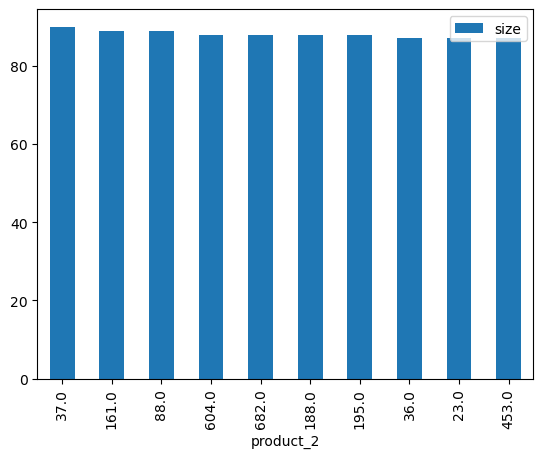

In [173]:
import matplotlib.pyplot as plt

pairs_counts.sort_values('size',ascending=False, inplace=True)
recommend_product = pairs_counts[pairs_counts["product_1"] == 46.0][0:10]

recommend_product.plot.bar(x="product_2",y="size")
plt.show()

Looks like every products have the same rate =))

In [168]:
product_clicked_id = 10
recommend_product = pairs_counts[pairs_counts["product_1"] == product_clicked_id]

In [169]:
products_idxs = recommend_product["product_2"].astype(int).values.tolist()
print(products_idxs)

[238, 613, 512, 535, 168, 448, 382, 454, 161, 233, 682, 98, 33, 49, 118, 208, 183, 195, 23, 87, 95, 69, 423, 387, 565, 689, 235, 350, 86, 1, 7, 3, 24, 659, 578, 604, 684, 442, 455, 388, 539, 155, 39, 45, 16, 70, 56, 64, 638, 685, 292, 198, 401, 376, 435, 322, 320, 369, 88, 90, 93, 115, 42, 615, 688, 558, 530, 516, 587, 575, 237, 314, 141, 150, 137, 509, 452, 453, 339, 348, 326, 392, 408, 378, 359, 46, 683, 677, 559, 524, 529, 543, 628, 594, 212, 289, 255, 276, 176, 456, 411, 503, 466, 474, 674, 668, 664, 630, 583, 279, 254, 201, 188, 182, 152, 149, 146, 83, 75, 53, 40, 294, 298, 329, 541, 537, 528, 522, 504, 460, 332, 397, 372, 366, 365, 344, 334, 37, 417, 385, 412, 410, 363, 357, 364, 343, 352, 371, 368, 553, 548, 449, 428, 431, 426, 508, 498, 497, 156, 123, 169, 73, 74, 36, 102, 79, 268, 251, 300, 302, 315, 313, 214, 225, 232, 602, 589, 651, 648, 647, 8, 130, 138, 94, 103, 273, 194, 189, 187, 229, 230, 206, 221, 220, 14, 19, 632, 619, 616, 662, 637, 660, 569, 561, 551, 599, 576, 347,

In [172]:
recommend_products = []
for idx in products_idxs:
        product = products[products["product_id"] == idx]
        product= {
            "product_id": product["product_id"].values[0], 
            "product_name": product["product_name"].values[0],
            "price": product["price"].values[0]
        }
        recommend_products.append(product)
print(recommend_products)

[{'product_id': 238, 'product_name': 'Black/White Diamond Promise Ring 1/6 ct tw Sterling Silver', 'price': 179.0}, {'product_id': 613, 'product_name': 'Le Vian Garnet Earrings 1/5 ct tw Diamonds 14K Strawberry Gold', 'price': 839.99}, {'product_id': 512, 'product_name': 'Diamond Solitaire Necklace 1/4 ct tw Round-cut 10K White Gold 18"', 'price': 629.0}, {'product_id': 535, 'product_name': 'Disney Treasures Mickey & Minnie Mouse Garnet & Diamond Necklace 1/8 ct tw Sterling Silver 17"', 'price': 249.99}, {'product_id': 168, 'product_name': 'Denim Jeans', 'price': 20.8}, {'product_id': 448, 'product_name': 'Beaded Cable Chain Necklace 14K Yellow Gold 16" Length', 'price': 399.99}, {'product_id': 382, 'product_name': 'Lab-Created Emerald MOM Necklace Sterling Silver 18"', 'price': 149.99}, {'product_id': 454, 'product_name': 'Curb Link Necklace 10K Two-Tone Gold 22" Length', 'price': 4299.99}, {'product_id': 161, 'product_name': 'Basic tee 1', 'price': 14.0}, {'product_id': 233, 'product

# Collaborative recommendation

Now we will recommend based on others users who might have the most similar preferences

In [19]:
ratings.drop(['price','product_name'],axis=1,inplace=True)

Because there are many duplicates in our ratings, we will remove the duplicates before creating pivot dataframe

In [20]:
pivot_users_ratings = ratings.pivot(index='user_id', columns='product_id',values='rating')
pivot_users_ratings

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0
13874,5.0,NaN,5.0,NaN,4.0,NaN,NaN,3.0,5.0,5.0,...,3.0,5.0,3.0,NaN,5.0,NaN,NaN,3.0,3.0,5.0
13879,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,...,5.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
13885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,...,4.0,NaN,4.0,4.0,4.0,NaN,NaN,4.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0
103991,NaN,NaN,NaN,2.0,5.0,2.0,NaN,2.0,NaN,5.0,...,2.0,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN
103992,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,4.0


Look at that, there are many NaN values -> not very ideal for our similarity metrics to operate, huh? We will do something about it. We first centering the users rating around 0 then fill 0s in the NaN

In [21]:
avg_ratings = pivot_users_ratings.mean(axis = 1)
pivot_users_ratings  = pivot_users_ratings.sub(avg_ratings, axis=0)
pivot_users_ratings = pivot_users_ratings.fillna(0)
pivot_users_ratings

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13874,0.715935,0.000000,0.715935,0.000000,-0.284065,0.000000,0.000000,-1.284065,0.715935,0.715935,...,-1.284065,0.715935,-1.284065,0.000000,0.715935,0.000000,0.000000,-1.284065,-1.284065,0.715935
13879,0.000000,-0.778426,-0.778426,0.000000,-0.778426,0.000000,0.000000,0.000000,0.000000,-0.778426,...,2.221574,0.000000,-0.778426,0.000000,0.000000,0.000000,-0.778426,0.000000,-0.778426,0.000000
13885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103991,0.000000,0.000000,0.000000,-1.540909,1.459091,-1.540909,0.000000,-1.540909,0.000000,1.459091,...,-1.540909,0.000000,0.000000,1.459091,-1.540909,0.000000,0.000000,0.000000,0.000000,0.000000
103992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now, let's change from User's Look to Products'Look =))) Then we will compare them all

In [22]:
pivot_products_ratings = pivot_users_ratings.T
pivot_products_ratings

user_id,3,6,13874,13879,13885,13892,14180,14486,14902,14906,...,103981,103982,103983,103985,103987,103988,103991,103992,103996,103997
product_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.715935,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.611814,0.0,0.0,-2.558376,0.0,0.000000,0.0,0.948031,0.0
2,0.0,0.0,0.000000,-0.778426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.051969,0.0
3,0.0,0.0,0.715935,-0.778426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.388186,0.0,0.0,0.000000,0.0,0.000000,0.0,-2.051969,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.388186,0.0,0.0,-2.558376,0.0,-1.540909,0.0,-0.051969,0.0
5,0.0,0.0,-0.284065,-0.778426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.388186,0.0,0.0,1.441624,0.0,1.459091,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.388186,0.0,0.0,-2.558376,0.0,0.000000,0.0,0.948031,0.0
688,0.0,0.0,0.000000,-0.778426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.611814,0.0,0.0,-2.558376,0.0,0.000000,0.0,-0.051969,0.0
689,0.0,0.0,-1.284065,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.611814,0.0,0.0,1.441624,0.0,0.000000,0.0,0.948031,0.0


Hehehehehehe, we will use consine_similarity for now. Hheehehhe, I still feel so smooth =vvvv

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [194]:
products_similarities = cosine_similarity(pivot_products_ratings)
products_similarities_df = pd.DataFrame(products_similarities, index = pivot_products_ratings.index, columns = pivot_products_ratings.index)
products_similarities_df

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
product_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.008118,0.033438,-0.113002,0.049991,-0.112487,-0.057874,0.061362,-0.070350,-0.035973,...,-0.064416,-0.170154,0.093201,0.044745,-0.123531,0.069409,-0.039648,0.017323,-0.101679,0.230484
2,0.008118,1.000000,-0.095739,0.062846,0.099779,0.015926,-0.103588,0.097638,0.042594,0.033609,...,0.227756,-0.058839,0.348725,-0.030298,-0.145607,0.085255,0.092699,0.025624,0.209434,-0.036319
3,0.033438,-0.095739,1.000000,-0.012175,0.086778,-0.061659,0.004456,-0.163360,-0.137981,0.020154,...,0.079142,0.076674,-0.162935,-0.158377,0.002665,0.142363,0.016033,-0.150570,-0.006451,0.083867
4,-0.113002,0.062846,-0.012175,1.000000,-0.039965,0.286333,-0.073940,-0.049076,0.054278,-0.078688,...,0.064976,-0.008429,0.147721,0.115700,0.193526,0.037033,0.129073,-0.052331,0.216473,0.017806
5,0.049991,0.099779,0.086778,-0.039965,1.000000,-0.282055,-0.176821,0.028218,0.106686,0.051969,...,-0.038249,0.099338,0.057600,0.054681,-0.216506,0.043628,0.102455,0.196840,0.220455,0.002235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.069409,0.085255,0.142363,0.037033,0.043628,0.021470,-0.102828,-0.065612,-0.112291,-0.027946,...,0.010684,-0.105391,-0.043206,0.111787,-0.032556,1.000000,0.010101,0.027378,0.107525,-0.029387
688,-0.039648,0.092699,0.016033,0.129073,0.102455,0.068313,0.017080,0.034125,0.154303,-0.158908,...,0.040108,0.068479,0.043207,-0.164533,0.151041,0.010101,1.000000,-0.236439,0.238270,-0.081231
689,0.017323,0.025624,-0.150570,-0.052331,0.196840,-0.095994,0.011617,-0.046560,-0.018702,0.008801,...,-0.037852,0.108665,0.028933,-0.022694,-0.083065,0.027378,-0.236439,1.000000,0.089797,0.104247


In [207]:
product_id = 101
recommend_product = products_similarities_df.loc[product_id].sort_values(ascending=False)[1:] # remove the itself at the top :v
products_idxs = recommend_product.index.tolist()
print(products_idxs)

[675, 339, 290, 625, 66, 41, 645, 596, 439, 458, 412, 294, 222, 546, 313, 609, 206, 115, 587, 77, 521, 291, 566, 616, 534, 592, 646, 431, 260, 631, 507, 217, 221, 511, 126, 383, 516, 197, 463, 183, 467, 408, 663, 485, 650, 678, 563, 503, 395, 469, 444, 269, 394, 686, 555, 350, 577, 405, 453, 575, 14, 148, 338, 434, 400, 87, 371, 251, 289, 231, 196, 229, 46, 423, 84, 255, 489, 301, 322, 540, 505, 44, 433, 258, 363, 68, 568, 263, 308, 580, 48, 656, 508, 492, 275, 392, 595, 318, 413, 325, 643, 239, 277, 267, 132, 170, 110, 22, 123, 100, 31, 327, 496, 63, 78, 562, 688, 545, 561, 559, 378, 215, 171, 166, 550, 332, 141, 346, 438, 549, 79, 662, 247, 26, 481, 9, 422, 50, 466, 522, 73, 191, 139, 520, 524, 273, 427, 528, 21, 220, 477, 129, 358, 597, 324, 526, 57, 353, 3, 571, 28, 607, 320, 154, 70, 209, 306, 249, 393, 91, 687, 471, 456, 105, 475, 590, 104, 494, 193, 288, 574, 347, 331, 214, 389, 369, 328, 542, 34, 465, 451, 440, 585, 261, 642, 626, 321, 223, 283, 341, 417, 224, 671, 654, 612, 94

In [208]:
recommend_products = []
for idx in products_idxs:
        product = products[products["product_id"] == idx]
        product= {
            "product_id": product["product_id"].values[0], 
            "product_name": product["product_name"].values[0],
            "price": product["price"].values[0]
        }
        recommend_products.append(product)
print(recommend_products)

[{'product_id': 675, 'product_name': 'Red Notice', 'price': 6.0}, {'product_id': 339, 'product_name': 'Cultured Pearl Ring 1/15 ct tw Diamonds Sterling Silver', 'price': 2499.99}, {'product_id': 290, 'product_name': 'Le Vian Nude and Chocolate Diamond Ring 1/4 ct tw 14K Honey Gold', 'price': 799.99}, {'product_id': 625, 'product_name': 'Laptop Dell Inspiron N3502 Pentium N5030/4GB/128GB/15.6"HD/Intel HD/Win 10/NK', 'price': 780.0}, {'product_id': 66, 'product_name': 'Ống hút kim loại', 'price': 0.0}, {'product_id': 41, 'product_name': 'Flower Girl Bracelet', 'price': 360.0}, {'product_id': 645, 'product_name': 'MEN DRY-EX Crew Neck Short Sleeve T-Shirt (Cotton Like)', 'price': 58.0}, {'product_id': 596, 'product_name': 'Brazilian Garnet Earrings 1/10 ct tw Diamonds 10K Yellow Gold', 'price': 599.99}, {'product_id': 439, 'product_name': 'Rope Chain Necklace 14K Yellow Gold 26" Length', 'price': 2649.99}, {'product_id': 458, 'product_name': 'Le Vian Diamond Butterfly Necklace 3/4 ct tw 1

Let's make our predictions for the first 10 products, each one with the 10 highest values

***Now let's use KNN*** 
We want to predict how the user would rate the products. Which mean how likely it is for the user if they sell the product, find that it is good and make profit or the other round. First, we will find the similarity between users

In [26]:
similarities = cosine_similarity(pivot_users_ratings)
users_similarities_df = pd.DataFrame(similarities, index = pivot_users_ratings.index, columns = pivot_users_ratings.index)
users_similarities_df

user_id,3,6,13874,13879,13885,13892,14180,14486,14902,14906,...,103981,103982,103983,103985,103987,103988,103991,103992,103996,103997
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
13874,0.0,0.0,1.000000,-0.029409,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.038740,0.0,0.0,-0.068114,0.0,0.051711,0.0,-0.054164,0.0
13879,0.0,0.0,-0.029409,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.044087,0.0,0.0,0.021147,0.0,-0.013943,0.0,-0.032589,0.0
13885,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
103991,0.0,0.0,0.051711,-0.013943,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.041710,0.0,0.0,0.054274,0.0,1.000000,0.0,-0.005679,0.0
103992,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


We find the 10 other users who might have similar experiences with user 1

In [231]:
user = users_similarities_df.loc[103991]
order_similarities = user.sort_values(ascending = False)
nearest_neighbor = order_similarities[0:10].index
print(nearest_neighbor)

Index([103991, 103911, 103812, 103958, 103505, 103454, 103890, 103678, 103702,
       103430],
      dtype='int64', name='user_id')


In [232]:
#Make a copy or else I will have to go up and down stairs waiting it run =))
null_pivot_users_ratings = ratings.pivot(index='user_id', columns='product_id',values='rating')
neighbor_ratings = null_pivot_users_ratings.reindex(nearest_neighbor)
#Let's see how how neighbors rate 683 product id
neighbor_ratings[683]

user_id
103991    NaN
103911    5.0
103812    1.0
103958    3.0
103505    2.0
103454    1.0
103890    5.0
103678    5.0
103702    NaN
103430    NaN
Name: 683, dtype: float64

In [233]:
copy_pivot_users_ratings = pivot_users_ratings.copy()
copy_pivot_users_ratings

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13874,0.715935,0.000000,0.715935,0.000000,-0.284065,0.000000,0.000000,-1.284065,0.715935,0.715935,...,-1.284065,0.715935,-1.284065,0.000000,0.715935,0.000000,0.000000,-1.284065,-1.284065,0.715935
13879,0.000000,-0.778426,-0.778426,0.000000,-0.778426,0.000000,0.000000,0.000000,0.000000,-0.778426,...,2.221574,0.000000,-0.778426,0.000000,0.000000,0.000000,-0.778426,0.000000,-0.778426,0.000000
13885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103991,0.000000,0.000000,0.000000,-1.540909,1.459091,-1.540909,0.000000,-1.540909,0.000000,1.459091,...,-1.540909,0.000000,0.000000,1.459091,-1.540909,0.000000,0.000000,0.000000,0.000000,0.000000
103992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Suppose we want to predict the user 3's rating for product 683, we will do the following

In [234]:
# Drop the product we want to predict
copy_pivot_users_ratings.drop(683, axis=1,inplace=True)
#Seperate our user 3
target_user_x = copy_pivot_users_ratings.loc[[103991]]
print(target_user_x)

product_id  1    2    3         4         5         6    7         8    9    \
user_id                                                                       
103991      0.0  0.0  0.0 -1.540909  1.459091 -1.540909  0.0 -1.540909  0.0   

product_id       10   ...  681       682  684       685       686  687  688  \
user_id               ...                                                     
103991      1.459091  ...  0.0 -1.540909  0.0  1.459091 -1.540909  0.0  0.0   

product_id  689  690  691  
user_id                    
103991      0.0  0.0  0.0  

[1 rows x 690 columns]


In [235]:
other_users_y = null_pivot_users_ratings[683]
print(other_users_y)

user_id
3         1.0
6         1.0
13874     5.0
13879     NaN
13885     NaN
         ... 
103988    NaN
103991    NaN
103992    NaN
103996    5.0
103997    1.0
Name: 683, Length: 344, dtype: float64


We only care about the users who have retailed the products

In [236]:
other_users_x = copy_pivot_users_ratings[other_users_y.notnull()]
print(other_users_x)

product_id       1         2         3         4         5         6    \
user_id                                                                  
3           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13874       0.715935  0.000000  0.715935  0.000000 -0.284065  0.000000   
14906       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15042       0.000000 -1.214815 -1.214815  1.785185  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
103971      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
103981      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
103983      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
103996      0.948031 -0.051969 -2.051969 -0.051969  0.000000 -0.051969   
103997      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

product_id       7         8         

Now,we will drop the rows which rating is empty

In [237]:
other_users_y.dropna(inplace = True)
print(other_users_y)

user_id
3         1.0
6         1.0
13874     5.0
14906     4.0
15042     5.0
         ... 
103971    5.0
103981    1.0
103983    1.0
103996    5.0
103997    1.0
Name: 683, Length: 151, dtype: float64


In [238]:
from sklearn.neighbors import KNeighborsRegressor
user_knn = KNeighborsRegressor(metric='cosine', n_neighbors = 10)
user_knn.fit(other_users_x, other_users_y)
user_user_pred = user_knn.predict(target_user_x)
print(user_user_pred)

[3.2]


***Here, we see that user 3 might rate product 683 a value 2.3. Phiuuuuuu, we have made it! Let's party overnight. The mean of other users is 2.6, our user rate is 2.8 - which is slightly higher than his peers***

# Matrix Factorization

For sparsity data of course is ploblematic for KNN as it will not take similarities into account

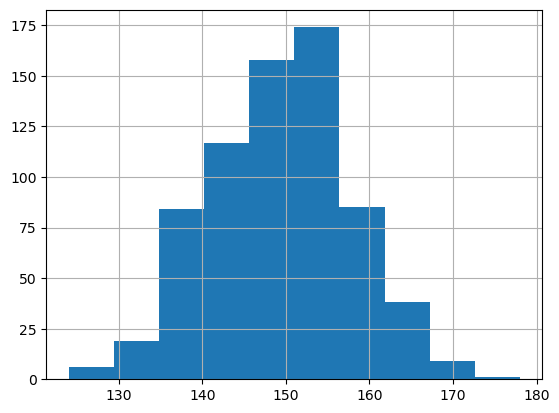

In [35]:
occupied_count = null_pivot_users_ratings.notnull().sum()
sorted_occupied_count = occupied_count.sort_values()
# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()
plt.show()

In [36]:
number_of_empty = null_pivot_users_ratings.isnull().values.sum()
total_number = null_pivot_users_ratings.size
sparsity = number_of_empty / total_number
print(sparsity)

0.5658592198700906


***0.44 % of our dataset is filled***

In [37]:
avg_ratings = null_pivot_users_ratings.mean(axis = 1)
user_ratings_centered  = null_pivot_users_ratings.sub(avg_ratings, axis=0)
user_ratings_centered.fillna(0, inplace = True)
print(null_pivot_users_ratings.shape)
print(user_ratings_centered.shape)

(344, 691)
(344, 691)


In [38]:
# Import the required libraries 
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix
import numpy as np
user_ratings_centered_sparse = csc_matrix(user_ratings_centered)
# Decompose the matrix
print(user_ratings_centered_sparse.shape)
U, sigma, Vt = svds(user_ratings_centered_sparse)

(344, 691)


In [39]:
print(U.shape)
print(Vt.shape)
print(sigma.shape)

(344, 6)
(6, 691)
(6,)


In [40]:
sigma = np.diag(sigma)
print(sigma)

[[45.62113818  0.          0.          0.          0.          0.        ]
 [ 0.         46.12892781  0.          0.          0.          0.        ]
 [ 0.          0.         47.24976724  0.          0.          0.        ]
 [ 0.          0.          0.         47.53629974  0.          0.        ]
 [ 0.          0.          0.          0.         49.32559927  0.        ]
 [ 0.          0.          0.          0.          0.         50.15416392]]


In [41]:
recalculated_ratings = np.dot(np.dot(U,sigma), Vt)

In [42]:
recalculated_ratings = recalculated_ratings + avg_ratings.values.reshape(-1,1)
print(recalculated_ratings.shape)

(344, 691)


In [43]:
pred_SVC = pd.DataFrame(recalculated_ratings, 
                        index=null_pivot_users_ratings.index,
                        columns=null_pivot_users_ratings.columns)

In [44]:
pred_SVC

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
user_id,,,,,,,,,,,,,,,,,,,,,
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
13874,4.239510,4.238286,4.371454,4.267592,4.226923,4.337019,4.205481,4.268958,4.259358,4.294306,...,4.274150,4.375474,4.096390,4.248117,4.267352,4.319587,4.290300,4.219831,4.214674,4.250349
13879,2.782496,2.666429,2.850443,2.664902,2.747350,2.786204,2.764157,2.703605,2.694041,2.773452,...,2.695962,2.838692,2.571030,2.758022,2.696080,2.717713,2.652219,2.803877,2.649967,2.839172
13885,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
103991,3.631979,3.501914,3.616102,3.294937,3.662871,3.478056,3.456111,3.616244,3.260312,3.723882,...,3.486479,3.514455,3.330103,3.582336,3.251312,3.431167,3.280934,3.635531,3.437324,3.632255
103992,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [248]:
user_13879_ratings = pred_SVC.loc[13874,:].sort_values(ascending=False)
user_13879_ratings

product_id
458    4.421322
566    4.404693
231    4.404165
606    4.403286
597    4.401911
         ...   
270    4.153034
661    4.147464
652    4.131433
335    4.129603
684    4.096390
Name: 13874, Length: 691, dtype: float64

In [252]:
customers=pd.read_json("data/customers.json")
customers

,Id,NickName
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen
...,...,...
673,103904,yenxaome
674,103610,yoneteru
675,103718,young.che
676,23251,zeatop939


In [256]:
users=pd.read_json("data/customers.json")
users.columns = ["user_id",'username']
users

,user_id,username
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen
...,...,...
673,103904,yenxaome
674,103610,yoneteru
675,103718,young.che
676,23251,zeatop939


In [259]:
user = users[users['user_id'] == 13879]
user["user_id"].values[0]

13879

In [251]:
for c in customers.values[400:410]:
    customerId=c[0]
    customerName=c[1]
    print("Customer [",customerId,customerName,"], Recommendation products:")
    user_3_ratings = pred_SVC.loc[3,:].sort_values(ascending=False)[:10]
    idxs = list(user_13879_ratings.index)
    for idx in idxs:
            p = products.values[idx-1]
            productId=p[0]
            productName=p[1]
            print("\tRecommend Product {}".format(productName))

Customer [ 103508 nhiennta ], Recommendation products:
	Recommend Product Le Vian Diamond Butterfly Necklace 3/4 ct tw 14K Honey Gold 18"
	Recommend Product Continuous Hoop Earrings 14K Yellow Gold 30mm
	Recommend Product Black/White Diamond Promise Ring 1/8 ct tw Sterling Silver
	Recommend Product Disney Treasures The Aristocats Diamond Earrings 1/10 ct tw Sterling Silver & 10K Rose Gold
	Recommend Product Lab-Created Ruby Earrings Lab-Created Sapphires Sterling Silver
	Recommend Product Unstoppable Love 1/6 ct tw Necklace Sterling Silver Angel
	Recommend Product Spirited Away
	Recommend Product Miracle: Letters to the President
	Recommend Product Diamond Solitaire Earrings 1/4 ct tw Sterling Silver
	Recommend Product Tuổi 20 tôi đã sống như một bông hoa dại
	Recommend Product Diamond Ring 1/15 ct tw Round-cut 10K Rose Gold
	Recommend Product Children's Cross Necklace 14K Yellow Gold 15"
	Recommend Product Hallmark Diamonds Heart Necklace 1/15 ct tw Sterling Silver
	Recommend Product 

	Recommend Product Cultured Pearl & White Lab-Created Sapphire Heart Necklace Sterling Silver 18"
	Recommend Product Godiva x Le Vian Diamond Heart Necklace 3/8 ct tw 14K Honey Gold 19"
	Recommend Product Heart Necklace Diamond Accents 10K Yellow Gold
	Recommend Product Xiaomi Mi A2 Lite
	Recommend Product Edge of Tomorrow
	Recommend Product Men's Cuban Curb Chain Necklace 6 ct tw Diamonds 10K Yellow Gold 22"
	Recommend Product Neil Lane Diamond Wedding Band 1/4 ct tw 14K White Gold
	Recommend Product Heart Necklace Diamond Accents 10K Rose Gold
	Recommend Product Forever Connected Diamond Necklace 1/2 ct tw Round/Pear 10K White Gold 18"
	Recommend Product Disney Treasures "Bambi" Diamond Ring 1/10 ct tw Sterling Silver & 10K Rose Gold
	Recommend Product Bamboo Straw
	Recommend Product Black/White Diamond Promise Ring 1/10 ct tw Sterling Silver
	Recommend Product Pisces Zodiac Necklace 1/10 ct tw Diamonds 10K Yellow Gold
	Recommend Product Short Jeans 02
	Recommend Product Disney Treas

	Recommend Product HP Spectre XT Pro UltraBook
	Recommend Product Anniversary Band 1/4 ct tw Diamonds 10K White Gold
	Recommend Product Amethyst & White Topaz Ring 10K Rose Gold
	Recommend Product Le Vian Diamond Earrings 1-1/3 ct tw 14K Honey Gold
	Recommend Product Hallmark Diamonds Swiss Blue Topaz Promise Ring 1/10 ct tw Sterling Silver & 10K Rose Gold
	Recommend Product Layered Three-Circle Drop Earrings 10K Yellow Gold
	Recommend Product Diamond Promise Ring 1/4 ct tw Round-cut 10K Rose Gold
	Recommend Product Amethyst Heart Necklace Diamond Accents Sterling Silver
	Recommend Product Diamond Promise Ring 1/5 ct tw Round-cut Sterling Silver
	Recommend Product Diamond Wedding Band 1/6 Carat tw 10K Rose Gold
	Recommend Product Heart Necklace 1/15 ct tw Diamonds Sterling Silver/10K Gold
	Recommend Product Natural Ruby Necklace 1/5 ct tw Diamonds 10K Rose Gold 17"
	Recommend Product Diamond Promise Ring 1/5 carat tw 10K White Gold
	Recommend Product Men's Diamond Band 1-1/2 ct tw Roun

	Recommend Product Le Vian Diamond Heart Necklace 1/4 ct tw 14K Honey Gold 18"
	Recommend Product [10TH] Bigbang Light Stick Head
	Recommend Product Twist Hoop Earrings 14K Yellow Gold 20mm
	Recommend Product Peaceminusone cap Gdragon - pea001
	Recommend Product Blue Topaz Ring 1/6 ct tw Diamonds 10K White Gold
	Recommend Product Leica T Mirrorless Digital Camera
	Recommend Product Lab-Created Ruby & Lab-Created White Sapphire Heart Necklace Sterling Silver 18"
	Recommend Product Diamond Promise Ring 1/4 ct tw Round-cut Sterling Silver
	Recommend Product Diamond Promise Ring 1/6 ct tw Round-cut Sterling Silver
	Recommend Product Escape Room
	Recommend Product 1/8 Ct. tw Diamond Nameplate Heart Necklace
	Recommend Product Giấy nảy mầm
	Recommend Product Lab-Created Emerald & White Lab-Created Sapphire Heart Necklace Sterling Silver 18"
	Recommend Product Children's Minnie Mouse Pink Cubic Zirconia Necklace 14K Yellow Gold 13"
	Recommend Product Stackable Diamond Ring 1/8 ct tw Diamonds 

	Recommend Product Ống hút inox
	Recommend Product Hành Trình Về Phương Đông
	Recommend Product Hoop Earrings Lab-Created Sapphires Sterling Silver
	Recommend Product Diamond Promise Ring 1/2 ct tw Round-cut 10K White Gold
	Recommend Product Samsung Galaxy Z Fold3 5G 256GB
	Recommend Product Amethyst Dainty Hoop Earrings Sterling Silver
	Recommend Product Nike SB Zoom Stefan Janoski "Medium Mint"
	Recommend Product Le Vian Chocolatier Ring 1-1/3 ct tw Diamonds 14K Vanilla Gold
	Recommend Product Le Vian Chocolate Diamond Ring 3/8 ct tw 14K Gold
	Recommend Product Disney Treasures The Aristocats Diamond Necklace 1/10 ct tw Sterling Silver & 10K Rose Gold 17"
	Recommend Product Diamond Eternity Ring 1 ct tw Round-cut 14K Yellow Gold
	Recommend Product HẠT GIỐNG KIWI
	Recommend Product Diamond Necklace 3/4 ct tw 10K Yellow Gold/Stainless Steel
	Recommend Product Diamond Anniversary Band 1/20 ct tw Round-cut 10K White Gold
	Recommend Product Unstoppable Love Necklace 1/2 ct tw 10K White 

	Recommend Product Ống hút giấy - copy
	Recommend Product $50 Physical Gift Card
	Recommend Product Túi mây hình thang
	Recommend Product Previously Owned Necklace 3/4 ct tw Diamonds 14K White Gold
	Recommend Product Men's Diamond Ankh Earrings 1/4 ct tw Round-cut 10K Yellow Gold
	Recommend Product Converse vàng bạch kim
	Recommend Product Opal & Diamond Earrings 1/20 ct tw 10K Yellow Gold
	Recommend Product Custom T-Shirt
	Recommend Product Color Stone Couple's Necklace
	Recommend Product Woven Heart Hoop Earrings 14K Yellow Gold
	Recommend Product Diamond Necklace 1/3 ct tw Round-cut 14K Yellow Gold
	Recommend Product Curb Link Necklace 10K Two-Tone Gold 22" Length
	Recommend Product Whale Necklace 10K Yellow Gold
	Recommend Product Cam Canh Hà Nội
	Recommend Product Lab-Created Ruby & White Lab-Created Sapphire Heart Necklace Sterling Silver 18"
	Recommend Product Laptop HP 240 G8 Pentium N5030/4GB/256GB/14.0"HD/Win 10
	Recommend Product Citrine Necklace 1/15 ct tw Diamonds 10K Yell

	Recommend Product Color Stone Nameplate Mrs. Necklace
	Recommend Product Unstoppable Love 1/20 ct tw Necklace Sterling Silver Flamingo
	Recommend Product Cửa Hàng Thời Trang
	Recommend Product Le Vian Grape Amethyst Ring 1/8 ct tw Diamonds 14K Strawberry Gold
	Recommend Product Black & White Diamond Promise Ring 1/6 ct tw Sterling Silver
	Recommend Product Laptop Asus VivoBook A415EA-EB1750W i3 1125G4/8GB/256GB SSD/Win11
	Recommend Product Ethiopian Opal & Diamond Ring 1/10 ct tw 10K Rose Gold
	Recommend Product Heart Necklace with Diamonds Sterling Silver/10K Rose Gold
	Recommend Product Diamond Hoop Earrings 1/10 ct tw Round-cut Sterling Silver
	Recommend Product Disney Treasures The Nightmare Before Christmas Diamond Necklace 1/5 ct tw Sterling Silver & 10K Rose Gold 17"
	Recommend Product Diamond Promise Ring 1/10 ct tw Round-cut Sterling Silver
	Recommend Product Amethyst & White Lab-Created Sapphire 'Mom' Heart Necklace Sterling Silver 18"
	Recommend Product Promise Ring Diamond

	Recommend Product Bone Infinity Ring 1/20 ct tw Blue Diamonds Sterling Silver
	Recommend Product Thú bông Baby Kookie JungKook doll BTS bản mini
	Recommend Product Le Vian Chocolate Diamonds 1/4 ct tw Earrings 14K Honey Gold
	Recommend Product Disney Treasures Winnie the Pooh "Eeyore" Diamond Necklace 1/15 ct tw Sterling Silver & 10K Rose Gold 17"
	Recommend Product Unstoppable Love Necklace Lab-Created Sapphire Sterling Silver
	Recommend Product Lightstick BLACKPINK
	Recommend Product Diamond Promise Ring 1/8 ct tw Round-cut Sterling Silver Ring
	Recommend Product Amethyst Heart Necklace With Diamond Accent Sterling Silver
	Recommend Product Le Vian Chocolate Quartz Ring 1/4 ct tw Diamonds 14K Gold
	Recommend Product Leo Zodiac Necklace 1/10 ct tw Diamonds 10K Yellow Gold
	Recommend Product Brazilian Garnet Earrings 1/10 ct tw Diamonds 10K Yellow Gold
	Recommend Product Lab-Created Ruby Earrings Sterling Silver 10K Yellow Gold
	Recommend Product Giày Sneaker Unisex Converse Chuck Tay

***Second Choice***

In [260]:
recommend =pd.read_json("data/ratings.json")
recommend.drop("CreateDate",inplace = True, axis=1)
recommend

,CustomerID,ProductID,Rate
0,103416,619,1
1,103654,411,1
2,103954,298,3
3,103672,361,5
4,103960,536,5
...,...,...,...
130749,103907,501,1
130750,103907,200,1
130751,103907,184,1
130752,103907,211,1


In [267]:
customers=pd.read_json("data/customers.json")
customers

,Id,NickName
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen
...,...,...
673,103904,yenxaome
674,103610,yoneteru
675,103718,young.che
676,23251,zeatop939


In [269]:
products=pd.read_json("data/products.json")
products

,Id,Name,UnitPrice
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0
...,...,...,...
686,687,Bird Box,1.0
687,688,Snowpiercer,2.0
688,689,Edge of Tomorrow,1.0
689,690,Ponyo,3.0


In [270]:
class MatrixFactorization(object):
    def __init__(self, Y,customers,products, K, lam = 0.1, Xinit = None, Winit = None, learning_rate = 0.5, max_iter = 1000, print_every = 100):
        self.Y = Y # represents the utility matrix
        self.K = K
        self.lam = lam # regularization parameter
        self.learning_rate = learning_rate # for gradient descent
        self.max_iter = max_iter # maximum number of iterations
        self.print_every = print_every # print loss after each a few iters
        self.customers=customers
        self.products=products
        self.n_users = int(np.max(Y[:, 0])) + 1
        self.n_items = int(np.max(Y[:, 1])) + 1
        #self.n_users = customers.size
        #self.n_items = products.size
        self.n_ratings = Y.shape[0] # number of known ratings
        self.X = np.random.randn(self.n_items, K) if Xinit is None\
        else Xinit
        self.W = np.random.randn(K, self.n_users) if Winit is None\
        else Winit
        self.b = np.random.randn(self.n_items) # item biases
        self.d = np.random.randn(self.n_users) # user biases
    def loss(self):
        L = 0
        for i in range(self.n_ratings):
            # user_id, item_id, rating
            n, m, rating = int(self.Y[i,0]), int(self.Y[i,1]), self.Y[i,2]
            L += 0.5*(self.X[m].dot(self.W[:, n])\
            + self.b[m] + self.d[n] - rating)**2
        L /= self.n_ratings
        # regularization, don’t ever forget this
        return L + 0.5*self.lam*(np.sum(self.X**2) + np.sum(self.W**2))
    def updateXb(self):
        products = np.array(self.products["Id"])
        for m in range(0,products.size):
            pId = products[m]
            # get all users who rated item m and corresponding ratings
            ids = np.where(self.Y[:, 1] == pId)[0] # row indices of items m
            if ids.size>0:
                user_ids, ratings=self.Y[ids, 0].astype(np.int32),self.Y[ids, 2]
                Wm, dm = self.W[:, user_ids], self.d[user_ids]
                for i in range(30): # 30 iteration for each sub problem
                    xm = self.X[m]
                    error = xm.dot(Wm) + self.b[m] + dm - ratings
                    grad_xm = error.dot(Wm.T)/self.n_ratings + self.lam*xm
                    grad_bm = np.sum(error)/self.n_ratings
                    # gradient descent
                    self.X[m] -= self.learning_rate*grad_xm.reshape(-1).astype('float64')
                    self.b[m] -= self.learning_rate*grad_bm
    def updateWd(self): # and d
        customers = np.array(self.customers["Id"])
        for n in range(0,customers.size):
            custId=customers[n]
            # get all items rated by user n, and the corresponding ratings
            ids = np.where(self.Y[:,0] == custId)[0] #indexes of items rated by n
            if ids.size>0:
                item_ids,ratings=self.Y[ids, 1].astype(np.int32), self.Y[ids, 2]
                Xn, bn = self.X[item_ids], self.b[item_ids]
                for i in range(30): # 30 iteration for each sub problem
                    wn = self.W[:, n]
                    error = Xn.dot(wn) + bn + self.d[n] - ratings
                    grad_wn = Xn.T.dot(error)/self.n_ratings + self.lam*wn
                    grad_dn = np.sum(error)/self.n_ratings
                    grad_dn=grad_dn
                    # gradient descent
                    self.W[:, n] -= self.learning_rate*grad_wn.reshape(-1).astype('float64')
                    self.d[n] -= self.learning_rate*grad_dn
    def fit(self):
        for it in range(self.max_iter):
            self.updateWd()
            self.updateXb()
            if (it + 1) % self.print_every == 0:
                rmse_train = self.evaluate_RMSE(self.Y)
                print("iter = %d, loss = %.4f, RMSE train = %.4f"%(it + 1,
                self.loss(), rmse_train))
    def predict(self, u, i):
        """
        predict the rating of user u for item i
        """
        try:
            u, i = int(u), int(i)
            pred = self.X[i, :].dot(self.W[:, u]) + self.b[i] + self.d[u]
            return max(0, min(5, pred))  # 5-scale in Ecommerce
        except:
            return  0        
    def evaluate_RMSE(self, rate_test):
        n_tests = rate_test.shape[0] # number of test
        SE = 0 # squared error
        for n in range(n_tests):
            pred = self.predict(rate_test[n, 0], rate_test[n, 1])
            SE += (pred - rate_test[n, 2])**2
        RMSE = np.sqrt(SE/n_tests)
        return RMSE

In [271]:
rate_train =recommend[0:129000]
rate_train = np.array(rate_train)
rate_test = recommend[129001:]
rate_test= np.array(rate_test)
print('Number of traing rates:', rate_train.shape[0])
print('Number of test rates:', rate_test.shape[0])

Number of traing rates: 129000
Number of test rates: 1753


In [272]:
# indices start from 0
rate_train[:, :2] -= 1
rate_test[:, :2] -= 1
mf = MatrixFactorization(rate_train,customers,products,K = 50, lam = .01, print_every = 5, learning_rate = 50,max_iter = 30)
mf.fit()
# evaluate on test data
RMSE = mf.evaluate_RMSE(rate_test)
print("\nMatrix Factorization CF, RMSE = %.4f" %RMSE)

iter = 5, loss = 25892.9199, RMSE train = 1.6833
iter = 10, loss = 25892.9199, RMSE train = 1.6833
iter = 15, loss = 25892.9199, RMSE train = 1.6833
iter = 20, loss = 25892.9199, RMSE train = 1.6833
iter = 25, loss = 25892.9199, RMSE train = 1.6833
iter = 30, loss = 25892.9199, RMSE train = 1.6833

Matrix Factorization CF, RMSE = 1.7864


In [273]:
expected_score=3.8
print("Expected Score =",expected_score)
for c in customers.values[0:10]:
    customerId=c[0]
    customerName=c[1]
    print("Customer [",customerId,customerName,"], recommendation products:")
    for p in products.values:
        productId=p[0]
        productName=p[1]
        result=mf.predict(customerId,productId)
        if result>=expected_score:
            print("\t Recommend Product [",productName, "] Score=",result)

Expected Score = 3.8
Customer [ 103603 1000kgthanh ], recommendation products:
Customer [ 103760 999999999ok ], recommendation products:
Customer [ 103829 ac7ive ], recommendation products:
	 Recommend Product [ Ponyo ] Score= 5
Customer [ 1 admin ], recommendation products:
Customer [ 103839 ahkk.nguyen ], recommendation products:
	 Recommend Product [ Build your own computer ] Score= 3.8175541785521343
	 Recommend Product [ Digital Storm VANQUISH 3 Custom Performance PC ] Score= 4.086078092936259
	 Recommend Product [ Lenovo IdeaCentre 600 All-in-One PC ] Score= 4.155160332180263
	 Recommend Product [ Apple MacBook Pro 13-inch ] Score= 3.8950967059386823
	 Recommend Product [ Asus N551JK-XO076H Laptop ] Score= 3.983917929025038
	 Recommend Product [ Samsung Series 9 NP900X4C Premium Ultrabook ] Score= 3.9778610167694533
	 Recommend Product [ HP Spectre XT Pro UltraBook ] Score= 4.000191432282808
	 Recommend Product [ HP Envy 6-1180ca 15.6-Inch Sleekbook ] Score= 4.058984728399339
	 R